In [1]:
# Licensed under the MIT License.

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.defender import ScanAndReimageCompromisedMachines
from cyberbattle._env.cyberbattle_env import AttackerGoal, DefenderConstraint, CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 100
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/defender_rulebased/plots"


In [6]:
# Load the Gym environment
gym_env = gym.make(
    gymid,
    size=10,
    attacker_goal=AttackerGoal(own_atleast=0, own_atleast_percent=1.0),
    defender_constraint=DefenderConstraint(maintain_sla=0.80),
    defender_agent=ScanAndReimageCompromisedMachines(probability=0.6, scan_capacity=2, scan_frequency=5),
).unwrapped

cyberbattlechain_defender = gym_env.unwrapped
assert isinstance(cyberbattlechain_defender, CyberBattleEnv)

ep = w.EnvironmentBounds.of_identifiers(maximum_total_credentials=22, maximum_node_count=22, identifiers=cyberbattlechain_defender.identifiers)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=100,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 22|reward:  116.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  130.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  130.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  132.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 30|reward:  132.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  232.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  232.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  238.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 1|Iteration 36|reward:  238.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  249.0|last_reward_at:   36|Elapsed Time: 0:00:00||

Episode 1|Iteration 37|reward:  249.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  251.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 1|Iteration 38|reward:  251.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  257.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 1|Iteration 39|reward:  257.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  261.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 1|Iteration 43|reward:  261.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  267.0|last_reward_at:   43|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:  267.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  267.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  276.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 87|reward:  276.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  376.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 1|Iteration 98|reward:  376.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  387.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  387.0|last_reward_at:   99|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  387.0|last_reward_at:   99|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/31 (0.16)
    explore-remote: 6/46 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/8 (0.27)
  exploit deflected to exploration: 6
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.8921, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 2|Iteration 8|reward:   18.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:  118.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  131.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 24|reward:  131.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  140.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 2|Iteration 29|reward:  140.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  240.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 2|Iteration 32|reward:  240.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  246.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 2|Iteration 33|reward:  246.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  257.0|last_reward_at:   33|Elapsed Time: 0:00:00||

Episode 2|Iteration 41|reward:  257.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 2|Iteration 45|reward:  266.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  272.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 2|Iteration 46|reward:  272.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  274.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 2|Iteration 54|reward:  274.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  374.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 2|Iteration 60|reward:  374.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  376.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 2|Iteration 61|reward:  376.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  387.0|last_reward_at:   61|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  387.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  395.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 2|Iteration 70|reward:  395.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  404.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 2|Iteration 86|reward:  404.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  504.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  504.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  515.0|last_reward_at:   87|Elapsed Time: 0:00:00||

Episode 2|Iteration 89|reward:  515.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  519.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  519.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  521.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 94|reward:  521.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  530.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  530.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  630.0|last_reward_at:   95|Elapsed Time: 0:00:00||

Episode 2|Iteration 98|reward:  630.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  630.0|last_reward_at:   98|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 9/29 (0.24)
    explore-remote: 9/45 (0.17)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 5/3 (0.62)
  exploit deflected to exploration: 6
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.8842, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   20.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  120.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  120.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  134.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:  134.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  140.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 46|reward:  140.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  240.0|last_reward_at:   46|Elapsed Time: 0:00:00||

Episode 3|Iteration 49|reward:  240.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  254.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  254.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  354.0|last_reward_at:   51|Elapsed Time: 0:00:00||

Episode 3|Iteration 52|reward:  354.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  356.0|last_reward_at:   52|Elapsed Time: 0:00:00||

Episode 3|Iteration 56|reward:  356.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  362.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  362.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 77|reward:  368.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  374.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 3|Iteration 91|reward:  374.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  374.0|last_reward_at:   91|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/24 (0.17)
    explore-remote: 5/63 (0.07)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/0 (1.00)
  exploit deflected to exploration: 2
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.8764, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 10|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  148.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 4|Iteration 13|reward:  148.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  150.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 4|Iteration 29|reward:  150.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  250.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 4|Iteration 38|reward:  250.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  252.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 4|Iteration 53|reward:  252.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 75|reward:  252.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  263.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 4|Iteration 81|reward:  263.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  265.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  265.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  274.0|last_reward_at:   82|Elapsed Time: 0:00:00||

Episode 4|Iteration 84|reward:  274.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  374.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 4|Iteration 92|reward:  374.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  388.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 4|Iteration 98|reward:  388.0|last_reward_at:   98|Elapsed Time: 0:00:00||

Episode 4|Iteration 100|reward:  388.0|last_reward_at:   98|Elapsed Time: 0:00:00||

  Episode 4 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/23 (0.21)
    explore-remote: 5/54 (0.08)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/9 (0.25)
  exploit deflected to exploration: 3
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.8687, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 5|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 5|Iteration 20|reward:   20.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  120.0|last_reward_at:   20|Elapsed Time: 0:00:00||

Episode 5|Iteration 25|reward:  120.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  134.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 5|Iteration 26|reward:  134.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  140.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 5|Iteration 29|reward:  140.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  146.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 5|Iteration 31|reward:  146.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  154.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 5|Iteration 32|reward:  154.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  254.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 5|Iteration 60|reward:  254.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 97|reward:  254.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 5|Iteration 100|reward:  254.0|last_reward_at:   60|Elapsed Time: 0:00:00||

  Episode 5 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/23 (0.12)
    explore-remote: 4/63 (0.06)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/5 (0.29)
  exploit deflected to exploration: 2
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.8611, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 6|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 6|Iteration 5|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  130.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 6|Iteration 6|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  136.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 6|Iteration 7|reward:  136.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  144.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 6|Iteration 9|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  244.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 6|Iteration 13|reward:  244.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:00:00||

Episode 6|Iteration 14|reward:  246.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  252.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 6|Iteration 18|reward:  252.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  263.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 6|Iteration 28|reward:  263.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  267.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 6|Iteration 29|reward:  267.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  276.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 6|Iteration 40|reward:  276.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  376.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 6|Iteration 45|reward:  376.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  378.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 6|Iteration 50|reward:  378.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  389.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 6|Iteration 66|reward:  389.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  395.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 6|Iteration 70|reward:  395.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  403.0|last_reward_at:   70|Elapsed Time: 0:00:00||

Episode 6|Iteration 76|reward:  403.0|last_reward_at:   76|Elapsed Time: 0:00:00||

Episode 6|Iteration 100|reward:  403.0|last_reward_at:   76|Elapsed Time: 0:00:00||

  Episode 6 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/23 (0.21)
    explore-remote: 8/57 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/3 (0.50)
  exploit deflected to exploration: 7
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.8535, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 16|reward:   14.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   16.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 7|Iteration 21|reward:   16.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   20.0|last_reward_at:   21|Elapsed Time: 0:00:00||

Episode 7|Iteration 24|reward:   20.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  120.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 7|Iteration 26|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 7|Iteration 39|reward:  131.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  140.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 7|Iteration 45|reward:  140.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  240.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 7|Iteration 48|reward:  240.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  254.0|last_reward_at:   48|Elapsed Time: 0:00:00||

Episode 7|Iteration 50|reward:  254.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  354.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 7|Iteration 53|reward:  354.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  360.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 7|Iteration 55|reward:  360.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  362.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 7|Iteration 56|reward:  362.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  368.0|last_reward_at:   56|Elapsed Time: 0:00:00||

Episode 7|Iteration 57|reward:  368.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 7|Iteration 60|reward:  370.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  376.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 7|Iteration 66|reward:  376.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:  390.0|last_reward_at:   66|Elapsed Time: 0:00:00||

Episode 7|Iteration 79|reward:  390.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward:  396.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 7|Iteration 80|reward:  396.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 93|reward:  496.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 7|Iteration 93|reward:  496.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  502.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 7|Iteration 96|reward:  502.0|last_reward_at:   96|Elapsed Time: 0:00:00||

Episode 7|Iteration 100|reward:  502.0|last_reward_at:   96|Elapsed Time: 0:00:00||

  Episode 7 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/21 (0.25)
    explore-remote: 7/56 (0.11)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/5 (0.44)
  exploit deflected to exploration: 6
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.8460, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 8|Iteration 6|reward:   16.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 8|Iteration 9|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  118.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 8|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  129.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 8|Iteration 35|reward:  129.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  135.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 8|Iteration 38|reward:  135.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  143.0|last_reward_at:   38|Elapsed Time: 0:00:00||

Episode 8|Iteration 41|reward:  143.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 64|reward:  143.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  152.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 8|Iteration 77|reward:  152.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 86|reward:  252.0|last_reward_at:   77|Elapsed Time: 0:00:00||

Episode 8|Iteration 86|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 8|Iteration 93|reward:  263.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 8|Iteration 93|reward:  263.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 94|reward:  267.0|last_reward_at:   93|Elapsed Time: 0:00:00||

Episode 8|Iteration 94|reward:  267.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  269.0|last_reward_at:   94|Elapsed Time: 0:00:00||

Episode 8|Iteration 97|reward:  269.0|last_reward_at:   97|Elapsed Time: 0:00:00||

Episode 8|Iteration 100|reward:  269.0|last_reward_at:   97|Elapsed Time: 0:00:00||

  Episode 8 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/28 (0.12)
    explore-remote: 6/60 (0.09)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/0 (1.00)
  exploit deflected to exploration: 11
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.8386, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 8|reward:   14.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 9|Iteration 9|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 9|Iteration 10|reward:   20.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  120.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 9|Iteration 30|reward:  120.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  134.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 9|Iteration 37|reward:  134.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  234.0|last_reward_at:   37|Elapsed Time: 0:00:00||

Episode 9|Iteration 40|reward:  234.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  240.0|last_reward_at:   40|Elapsed Time: 0:00:00||

Episode 9|Iteration 41|reward:  240.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  246.0|last_reward_at:   41|Elapsed Time: 0:00:00||

Episode 9|Iteration 50|reward:  246.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward:  260.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 9|Iteration 53|reward:  260.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  262.0|last_reward_at:   53|Elapsed Time: 0:00:00||

Episode 9|Iteration 55|reward:  262.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  266.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 9|Iteration 58|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 78|reward:  266.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  366.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 9|Iteration 79|reward:  366.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:  380.0|last_reward_at:   79|Elapsed Time: 0:00:00||

Episode 9|Iteration 80|reward:  380.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 86|reward:  386.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 9|Iteration 86|reward:  386.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 9|Iteration 90|reward:  392.0|last_reward_at:   86|Elapsed Time: 0:00:00||

Episode 9|Iteration 90|reward:  392.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  492.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 9|Iteration 91|reward:  492.0|last_reward_at:   91|Elapsed Time: 0:00:00||

Episode 9|Iteration 100|reward:  492.0|last_reward_at:   91|Elapsed Time: 0:00:00||

  Episode 9 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/17 (0.23)
    explore-remote: 7/63 (0.10)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 4/4 (0.50)
  exploit deflected to exploration: 6
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.8312, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 13|reward:   14.0|last_reward_at:   13|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 14|reward:   14.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 10|Iteration 18|reward:   16.0|last_reward_at:   13|Elapsed Time: 0:00:01||

Episode 10|Iteration 18|reward:   16.0|last_reward_at:   18|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 19|reward:   16.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 10|Iteration 24|reward:  116.0|last_reward_at:   18|Elapsed Time: 0:00:02||

Episode 10|Iteration 24|reward:  116.0|last_reward_at:   24|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 25|reward:  116.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 10|Iteration 28|reward:  118.0|last_reward_at:   24|Elapsed Time: 0:00:02||

Episode 10|Iteration 28|reward:  118.0|last_reward_at:   28|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 29|reward:  118.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 10|Iteration 33|reward:  129.0|last_reward_at:   28|Elapsed Time: 0:00:02||

Episode 10|Iteration 33|reward:  129.0|last_reward_at:   33|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 34|reward:  129.0|last_reward_at:   33|Elapsed Time: 0:00:02||

Episode 10|Iteration 35|reward:  135.0|last_reward_at:   33|Elapsed Time: 0:00:02||

Episode 10|Iteration 35|reward:  135.0|last_reward_at:   35|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 36|reward:  135.0|last_reward_at:   35|Elapsed Time: 0:00:03||

Episode 10|Iteration 38|reward:  143.0|last_reward_at:   35|Elapsed Time: 0:00:03||

Episode 10|Iteration 38|reward:  143.0|last_reward_at:   38|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 39|reward:  143.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 10|Iteration 47|reward:  143.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 10|Iteration 47|reward:  152.0|last_reward_at:   38|Elapsed Time: 0:00:03||

Episode 10|Iteration 47|reward:  152.0|last_reward_at:   47|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 48|reward:  152.0|last_reward_at:   47|Elapsed Time: 0:00:03||

Episode 10|Iteration 51|reward:  252.0|last_reward_at:   47|Elapsed Time: 0:00:03||

Episode 10|Iteration 51|reward:  252.0|last_reward_at:   51|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 52|reward:  252.0|last_reward_at:   51|Elapsed Time: 0:00:04||

Episode 10|Iteration 66|reward:  266.0|last_reward_at:   51|Elapsed Time: 0:00:04||

Episode 10|Iteration 66|reward:  266.0|last_reward_at:   66|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 67|reward:  266.0|last_reward_at:   66|Elapsed Time: 0:00:04||

Episode 10|Iteration 68|reward:  270.0|last_reward_at:   66|Elapsed Time: 0:00:04||

Episode 10|Iteration 68|reward:  270.0|last_reward_at:   68|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 69|reward:  270.0|last_reward_at:   68|Elapsed Time: 0:00:04||

Episode 10|Iteration 72|reward:  370.0|last_reward_at:   68|Elapsed Time: 0:00:04||

Episode 10|Iteration 72|reward:  370.0|last_reward_at:   72|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 73|reward:  370.0|last_reward_at:   72|Elapsed Time: 0:00:04||

Episode 10|Iteration 79|reward:  376.0|last_reward_at:   72|Elapsed Time: 0:00:04||

Episode 10|Iteration 79|reward:  376.0|last_reward_at:   79|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 80|reward:  376.0|last_reward_at:   79|Elapsed Time: 0:00:05||

Episode 10|Iteration 80|reward:  387.0|last_reward_at:   79|Elapsed Time: 0:00:05||

Episode 10|Iteration 80|reward:  387.0|last_reward_at:   80|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 81|reward:  387.0|last_reward_at:   80|Elapsed Time: 0:00:05||

Episode 10|Iteration 85|reward:  389.0|last_reward_at:   80|Elapsed Time: 0:00:05||

Episode 10|Iteration 85|reward:  389.0|last_reward_at:   85|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 86|reward:  389.0|last_reward_at:   85|Elapsed Time: 0:00:05||

Episode 10|Iteration 86|reward:  395.0|last_reward_at:   85|Elapsed Time: 0:00:05||

Episode 10|Iteration 86|reward:  395.0|last_reward_at:   86|Elapsed Time: 0:00:05||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 87|reward:  395.0|last_reward_at:   86|Elapsed Time: 0:00:06||

Episode 10|Iteration 90|reward:  403.0|last_reward_at:   86|Elapsed Time: 0:00:06||

Episode 10|Iteration 90|reward:  403.0|last_reward_at:   90|Elapsed Time: 0:00:06||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanExplorerRecentFiles, SudoA...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeLinux, ProbeWindows]"
4_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 10|Iteration 91|reward:  403.0|last_reward_at:   90|Elapsed Time: 0:00:06||

Episode 10|Iteration 100|reward:  403.0|last_reward_at:   90|Elapsed Time: 0:00:06||

  Episode 10 stopped at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/23 (0.21)
    explore-remote: 8/58 (0.12)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 3/2 (0.60)
  exploit deflected to exploration: 11
simulation ended


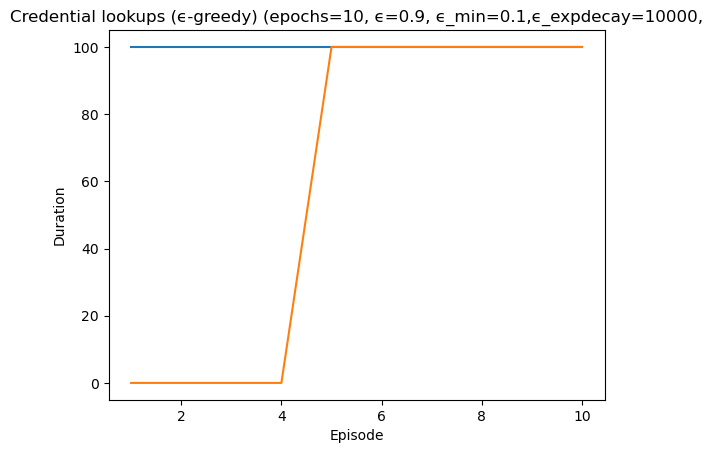

In [7]:
credlookup_run = learner.epsilon_greedy_search(
    cyberbattlechain_defender,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"rulebased-{gymid}"),
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

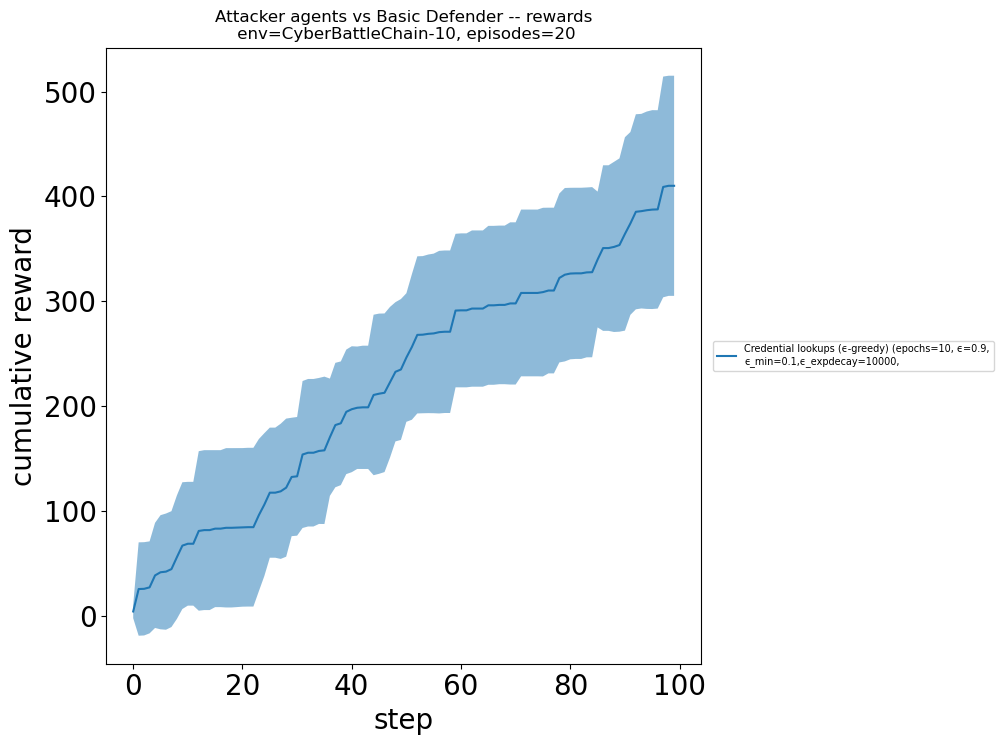

In [8]:
# Plots
all_runs = [credlookup_run]
p.plot_averaged_cummulative_rewards(all_runs=all_runs, title=f"Attacker agents vs Basic Defender -- rewards\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", save_at=os.path.join(plots_dir, "withdefender-cumreward.png"))
# p.plot_episodes_length(all_runs)
p.plot_averaged_availability(title=f"Attacker agents vs Basic Defender -- availability\n env={cyberbattlechain_defender.name}, episodes={training_episode_count}", all_runs=all_runs, show=False)